<a href="https://colab.research.google.com/github/nguyenphucloc22/test/blob/main/W8_ANN_Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

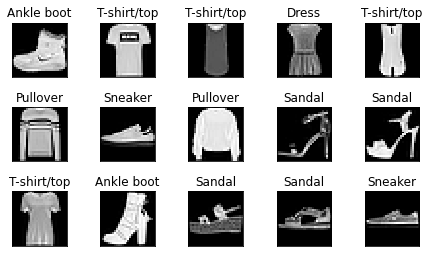

In [4]:
class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap='gray', interpolation='none')
  plt.title('{}'.format(class_name[train_labels[i]]))
  plt.xticks([])
  plt.yticks([])

In [5]:
train_images = train_images.reshape((60000,28*28)) 
train_images = train_images.astype('float32')/255 
test_images =  test_images.reshape((10000, 28*28)) 
test_images = test_images.astype('float32')/255
train_images.shape

(60000, 784)

In [6]:
train_labels = keras.utils.to_categorical(train_labels, 10) 
test_labels = keras.utils.to_categorical(test_labels, 10)
print(train_labels.shape)
print(test_labels.shape)

(60000, 10)
(10000, 10)


In [7]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(512,input_shape = (784,), activation='relu', name="Layer_1"))
model.add(Dense(256, activation='relu', name="Layer_2"))
model.add(Dense(128, activation='relu', name="Layer_3"))
model.add(Dense(10,activation='softmax', name = "Output_layer"))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 512)               401920    
                                                                 
 Layer_2 (Dense)             (None, 256)               131328    
                                                                 
 Layer_3 (Dense)             (None, 128)               32896     
                                                                 
 Output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("test_accuracy",test_acc)
print("test_loss", test_loss)

Epoch 1/10
469/469 [==============================] - 5s 11ms/step - loss: 0.2295 - accuracy: 0.9132
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.2224 - accuracy: 0.9161
Epoch 3/10
469/469 [==============================] - 4s 10ms/step - loss: 0.2156 - accuracy: 0.9183
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.2113 - accuracy: 0.9190
Epoch 5/10
469/469 [==============================] - 4s 10ms/step - loss: 0.2071 - accuracy: 0.9218
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.2037 - accuracy: 0.9229
Epoch 7/10
469/469 [==============================] - 4s 10ms/step - loss: 0.1994 - accuracy: 0.9242
Epoch 8/10
469/469 [==============================] - 4s 10ms/step - loss: 0.1961 - accuracy: 0.9262
Epoch 9/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1929 - accuracy: 0.9274
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.4287 - accurac